# GitHub Pages 
## Test for data manipulation

[Github repo]:https://github.com/gyphonic/gyphonic.github.io/tree/main
[here]:https://www.kaggle.com/datasets/konradb/prison-population-in-the-us
- Information about the dataset used [here]
- [Github repo]

## Index
- [Dataframe Creation](#dataframe=creation)
- [Plotting Population](#first_plot)
- [Diving Deeper](diving_deeper)
- clean data
- regression
- analysis

## Dataframe Creation
<a name="dataframe-creation" />
Here we create a 'DataFrame' object and view the raw data using 'pandas'

In [112]:
import pandas as pd

data = pd.DataFrame(pd.read_csv("data/populations_states.csv", parse_dates = ["date"]))
data

date data_or_inferred  incarcerated_total  incarcerated_white  \
0    2000-01-01         raw data             25213.0                8753   
1    2000-02-01         raw data             25213.0                8753   
2    2000-03-01         raw data             25161.0                8723   
3    2000-04-01         raw data             25200.0                8738   
4    2000-05-01         raw data             25226.0                8788   
...         ...              ...                 ...                 ...   
9580 2022-05-01         raw data            156704.0               90396   
9581 2022-06-01         raw data            157426.0               90785   
9582 2022-07-01         raw data            157435.0               90792   
9583 2022-08-01         raw data            157565.0               90837   
9584 2022-09-01         raw data            158041.0               91122   

      incarcerated_black  incarcerated_hispanic  incarcerated_amerind  \
0                16382.0                    NaN                   NaN   
1                16382.0                    NaN                   NaN   
2                16361.0                    NaN                   NaN   
3                16380.0                    NaN                   NaN   
4                16358.0                    NaN                   NaN   
...                  ...                    ...                   ...   
9580             60041.0                    NaN                3998.0   
9581             60370.0                    NaN                3997.0   
9582             60386.0                    NaN                3995.0   
9583             60470.0                    NaN                4015.0   
9584             60652.0                    NaN                4023.0   

      incarcerated_asian  incarcerated_other  incarcerated_unknown  \
0                    NaN                78.0                   NaN   
1                    NaN                78.0                   NaN   
2                    NaN                77.0                   NaN   
3                    NaN                82.0                   NaN   
4                    NaN                80.0                   NaN   
...                  ...                 ...                   ...   
9580              2269.0                 NaN                   NaN   
9581              2274.0                 NaN                   NaN   
9582              2262.0                 NaN                   NaN   
9583              2243.0                 NaN                   NaN   
9584              2244.0                 NaN                   NaN   

      incarcerated_nonwhite    state  \
0                   16460.0  Alabama   
1                   16460.0  Alabama   
2                   16438.0  Alabama   
3                   16462.0  Alabama   
4                   16438.0  Alabama   
...                     ...      ...   
9580                66308.0  Federal   
9581                66641.0  Federal   
9582                66643.0  Federal   
9583                66728.0  Federal   
9584                66919.0  Federal   

                                                    url  
0                http://www.doc.state.al.us/StatReports  
1                http://www.doc.state.al.us/StatReports  
2                http://www.doc.state.al.us/StatReports  
3                http://www.doc.state.al.us/StatReports  
4                http://www.doc.state.al.us/StatReports  
...                                                 ...  
9580  https://www.bop.gov/about/statistics/statistic...  
9581  https://www.bop.gov/about/statistics/statistic...  
9582  https://www.bop.gov/about/statistics/statistic...  
9583  https://www.bop.gov/about/statistics/statistic...  
9584  https://www.bop.gov/about/statistics/statistic...  

[9585 rows x 13 columns]

## Plotting Population
<a name="first_plot" />
Now that we know what's in the 'DataFrame', let's show a basic line plot of incarcerated population over time.

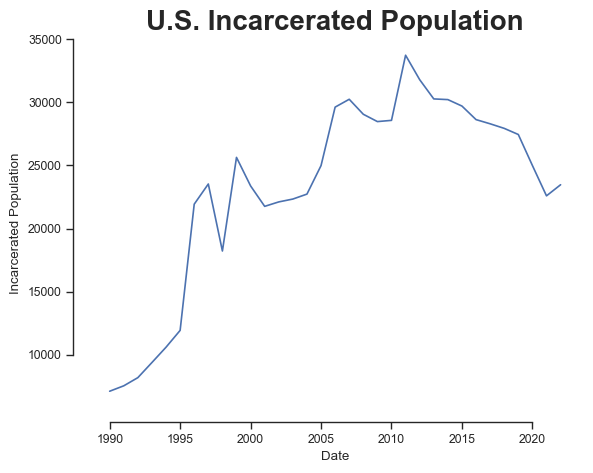

In [116]:
import seaborn as sns

sns.set_theme()
sns.set_style("ticks")
sns.set_context("paper")

data["year"] = data["date"].dt.year

g = sns.lineplot(data = data, x = "year", y = "incarcerated_total", errorbar = None)
g.set_title("U.S. Incarcerated Population", fontdict = {"size": 20, "weight": "bold"})
g.set_ylabel("Incarcerated Population")
g.set_xlabel("Date")
sns.despine(offset = 10, trim = True)


# Diving deeper
<a name="diving_deeper" />
We should look individual populations of prisons over time. Let's define a list of locations we'd like to see and compare them.

In [82]:
data["state"].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Federal'], dtype=object)

Here we have a list of all of the unique values in the "state" column. We will select a few values from this field to narrow our research down to a few key states. Adding "Federal" as well might provide additional context.

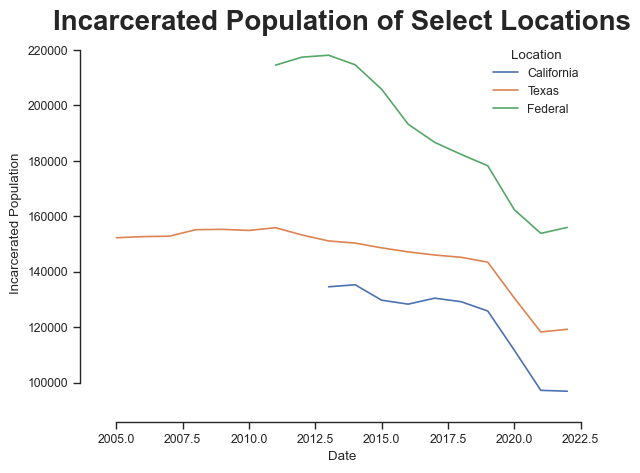

In [121]:
locations = ("California", "Texas", "Federal")
g = (sns.lineplot(data=data.loc[(data["state"].isin(locations))], x = "year", y = "incarcerated_total", hue = "state", errorbar = None))
g.set_title("Incarcerated Population of Select Locations", fontdict = {"size": 20, "weight": "bold"})
g.set_ylabel("Incarcerated Population")
g.set_xlabel("Date")
g.legend(title = "Location", frameon = False)
sns.despine(offset = 10, trim = True)

According to the data in the previous graphs, prison population appears to be on a decline. however, we have several important factors to consider. Not all locations have values reported for all given dates in our dataset. This could affect how population can be percieved as "growing" over time. We should look at year by year changes to see the velocity of prison population.